In [153]:
import pandas as pd
import numpy as np

In [154]:
df = pd.read_csv('data/us census data.csv')

In [155]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,2174,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,<=50K


In [156]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,48842,7,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,48842.0,NaN,NaN,NaN,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [157]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [158]:
df = df.replace("?","Other")
X = df.iloc[:, :-1]
X_cols = X.columns
y = df.iloc[:, -1]

In [16]:
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
gbc = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=4).fit(X_train,y_train)

In [40]:
gbc.score(X_train,y_train)

0.8850357024031941

In [41]:
gbc.score(X_test,y_test)

0.8722489507626164

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter:
scoring = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(precision_score)}

# A sample parameter

parameters = {
    "learning_rate": [0.05,0.1,0.2,0.5,1.0],
    "max_depth":[2,3,4,5],
    "n_estimators": np.linspace(100,500,7,dtype=int)
}
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=5, n_jobs=-1)

clf.fit(X_train, y_train)
#converting the clf.cv_results to dataframe
df=pd.DataFrame.from_dict(clf.cv_results_)

In [107]:
df[['mean_test_accuracy','mean_test_f1']]

,mean_test_accuracy,mean_test_f1
0,0.843063,0.823440
1,0.843063,0.823440
2,0.856167,0.802526
3,0.856167,0.802526
4,0.860902,0.797506
...,...,...
355,0.845392,0.687539
356,0.844471,0.684936
357,0.844650,0.685107
358,0.842910,0.682428


In [108]:
df.loc[df['mean_test_accuracy'].idxmax()]['params']

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 350, 'warm_start': True}

In [160]:
clf = GradientBoostingClassifier(learning_rate=0.1,max_depth=4,n_estimators=300)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
accuracy_score(y_test,preds)

ValueError: could not convert string to float: 'Other'

In [130]:
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_roc_curve

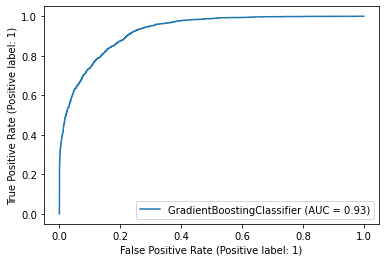

In [131]:
plot_roc_curve(clf,X_test,y_test)

In [113]:
confusion_matrix(y_test,preds,normalize='true')

array([[0.94253028, 0.05746972],
       [0.35314237, 0.64685763]])

In [164]:
import catboost as cb

In [162]:
model = cb.CatBoostClassifier(logging_level='Silent',eval_metric = 'Accuracy',cat_features=[1,3,4,5,6,7,8,10])

grid = {'learning_rate': [0.05, 0.1,0.2,0.5,1.0],
        'depth': [2, 3, 4, 5],
        'n_estimators': [100]
        }

grid_search_result = model.grid_search(grid,
                                       X=X_train,
                                       y=y_train,
                                       cv=5,
                                       verbose=False
                                       )

In [163]:
grid_search_result

{'params': {'depth': 3, 'iterations': 100, 'learning_rate': 1.0},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    